# ROAD COST ANALYSIS 

## PART I - DATA ANALYSIS

### Introduction
In this part of the project, we will analyze the previously prepared data on road construction costs in Poland.

The original data contains the following columns:

* 'Elementy_rozliczeniowe': Billing elements
* 'Jednostka': Measure unite
* 'Ilosc': Quantity
* 'Cena_jedn': Unit price
* 'Wartosc_calkowita': Total value
* 'Droga': Road number
* 'Rok': Year
* 'Dlugosc_drogi': Road length
* 'Kategoria_robot': Road number
* 'Kategoria_drogi': Category of construction works
* 'Cena_jedn_per_km': Unit price per km
* 'Wartosc_calkowita_per_km': Total value per km

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Read the excel file**

In [2]:
road_data = pd.read_excel('..\Projekt_Analiza_Danych\DATA\Road_cost_analysis.xlsx')

**Checking the basic informations of the DataFrame**

In [3]:
road_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Elementy_rozliczeniowe           2105 non-null   object        
 1   Jednostka                        2105 non-null   object        
 2   Ilosc                            2103 non-null   float64       
 3   Cena_jedn                        2105 non-null   float64       
 4   Wartosc_calkowita                2103 non-null   float64       
 5   Droga                            2105 non-null   object        
 6   Rok                              2105 non-null   datetime64[ns]
 7   Kategoria_robot                  2105 non-null   object        
 8   Kategoria_drogi                  2105 non-null   object        
 9   Dlugosc_drogi                    2105 non-null   float64       
 10  Cena_jedn_per_km                 2105 non-null   float64    

In [4]:
road_data.head()

,Elementy_rozliczeniowe,Jednostka,Ilosc,Cena_jedn,Wartosc_calkowita,Droga,Rok,Kategoria_robot,Kategoria_drogi,Dlugosc_drogi,...,Wartosc_calkowita_kat,Cena_jedn_per_km_kat,Ilosc_per_km_kat,Wartosc_calkowita_per_km_kat,Cena_jedn_calosc,Ilosc_calosc,Wartosc_calkowita_calosc,Cena_jedn_per_km_calosc,Ilosc_per_km_calosc,Wartosc_calkowita_per_km_calosc
0,Koszt dostosowania się do wymagań ogólnych zaw...,ryczałt,1.0,280864.20,280864.20,DK12ZW,2019-01-01,WARUNKI OGOLNE,Krajowa,24.24,...,114001.142130,4703.017415,0.016745,4703.017415,32534.398394,0.115837,32534.398394,1342.178152,0.004779,1342.178152
1,Dokumentacja realizacyjno-technologiczna i dok...,ryczałt,1.0,33703.70,33703.70,DK12ZW,2019-01-01,WARUNKI OGOLNE,Krajowa,24.24,...,13680.135432,564.362023,0.016745,564.362023,3904.127344,0.115837,3904.127344,161.061359,0.004779,161.061359
2,"Koszt utrzymania dróg, po których odbywać się ...",ryczałt,1.0,224691.36,224691.36,DK12ZW,2019-01-01,WARUNKI OGOLNE,Krajowa,24.24,...,91200.913704,3762.413932,0.016745,3762.413932,26027.518715,0.115837,26027.518715,1073.742521,0.004779,1073.742521
3,Saperskie sprawdzenie terenu pod kątem niewypa...,ryczałt,1.0,33703.70,33703.70,DK12ZW,2019-01-01,WARUNKI OGOLNE,Krajowa,24.24,...,13680.135432,564.362023,0.016745,564.362023,3904.127344,0.115837,3904.127344,161.061359,0.004779,161.061359
4,Nadzór archeologiczny wraz z wykonaniem ratown...,ryczałt,1.0,28086.42,28086.42,DK12ZW,2019-01-01,WARUNKI OGOLNE,Krajowa,24.24,...,11400.114213,470.301741,0.016745,470.301741,3253.439839,0.115837,3253.439839,134.217815,0.004779,134.217815


In [5]:
road_data.describe()

,Ilosc,Cena_jedn,Wartosc_calkowita,Dlugosc_drogi,Cena_jedn_per_km,Ilosc_per_km,Wartosc_calkowita_per_km,Cena_jedn_kat,Ilosc_kat,Wartosc_calkowita_kat,Cena_jedn_per_km_kat,Ilosc_per_km_kat,Wartosc_calkowita_per_km_kat,Cena_jedn_calosc,Ilosc_calosc,Wartosc_calkowita_calosc,Cena_jedn_per_km_calosc,Ilosc_per_km_calosc,Wartosc_calkowita_per_km_calosc
count,2103.000000,2.105000e+03,2.103000e+03,2105.000000,2105.000000,2103.000000,2.103000e+03,2105.000000,2103.000000,2.103000e+03,2105.000000,2103.000000,2103.000000,2105.000000,2103.000000,2.103000e+03,2105.000000,2103.000000,2103.000000
mean,13444.852454,1.047572e+04,4.092476e+05,11.493145,1080.077065,1401.019417,4.273183e+04,1304.472729,2576.439019,7.799199e+04,105.096354,198.751038,6165.867604,635.122876,888.870594,2.634419e+04,50.060806,64.249510,1955.689485
std,36049.174818,1.754202e+05,1.043331e+06,5.812868,14337.053080,4381.102275,1.156106e+05,16591.376649,11143.605576,3.294163e+05,1305.346467,820.416353,24006.534509,10665.775700,3130.213120,8.906380e+04,838.288265,172.269783,4985.810343
min,0.070000,1.170000e+00,2.599000e+01,0.800000,0.062706,0.008662,1.917596e+00,0.006703,0.001948,9.592667e-01,0.008379,0.000645,0.186121,0.004473,0.001300,6.401223e-01,0.005591,0.000335,0.124200
25%,44.000000,3.279000e+01,1.200336e+04,7.080000,2.853365,4.144645,1.261849e+03,2.831343,3.941369,1.111453e+03,0.292532,0.434311,120.681037,1.422840,1.673898,5.001159e+02,0.156695,0.210265,57.361010
50%,443.000000,7.433000e+01,5.983145e+04,10.780000,8.613162,49.919743,6.657242e+03,8.742465,44.171412,6.635804e+03,0.900536,4.843097,649.058293,3.657268,21.545637,2.788110e+03,0.355204,2.116984,285.919191
75%,5604.465000,3.376000e+02,2.845398e+05,12.980000,41.574859,568.069318,2.984189e+04,44.315912,630.915241,3.606517e+04,4.411253,59.731775,2932.200012,17.227296,270.851401,1.640953e+04,1.613304,26.782304,1359.742775
max,496551.690000,5.617284e+06,1.423980e+07,24.240000,450825.357143,113356.025000,2.943856e+06,515708.824398,201547.437468,5.779852e+06,40226.897379,17213.142424,422986.743939,344134.475002,57518.937999,1.649492e+06,26843.562793,2372.893482,68048.365379


**Visualize the cost of particular road**

<Figure size 864x576 with 0 Axes>

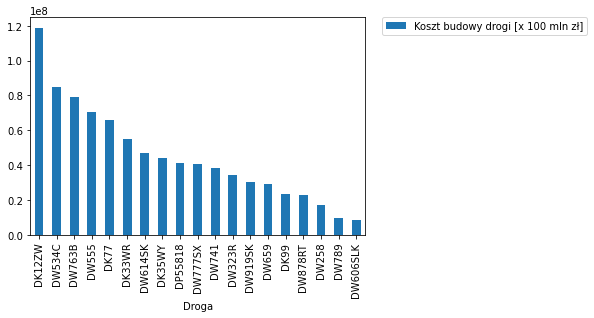

<Figure size 864x576 with 0 Axes>

In [6]:
road_data.groupby(['Droga'], as_index=False).agg({'Wartosc_calkowita': 'sum'}).sort_values(by=['Wartosc_calkowita'],ascending=False).plot.bar(x='Droga', y='Wartosc_calkowita',label='Koszt budowy drogi [x 100 mln zł]',)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(12,8))

**Visualize the length of particular road**

<Figure size 864x576 with 0 Axes>

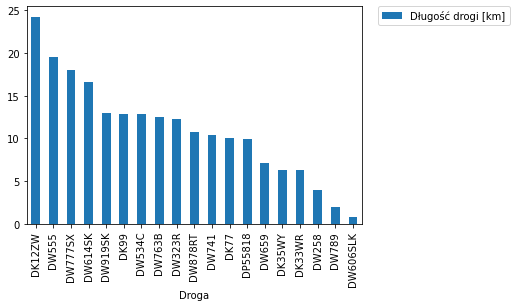

<Figure size 864x576 with 0 Axes>

In [7]:
road_data.groupby(['Droga'], as_index=False).agg({'Dlugosc_drogi': 'max'}).sort_values(by=['Dlugosc_drogi'],ascending=False).plot.bar(x='Droga', y='Dlugosc_drogi',label='Długość drogi [km]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(12,8))

**Visualize the cost of 1 km of particular road**

<Figure size 864x576 with 0 Axes>

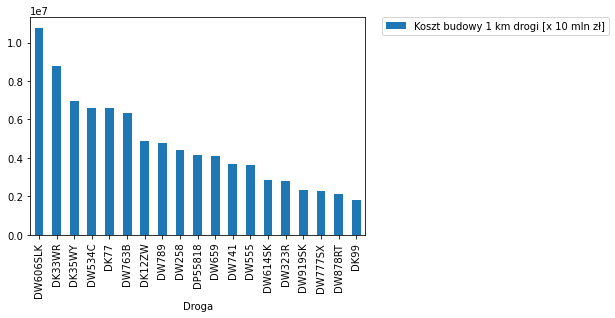

<Figure size 864x576 with 0 Axes>

In [8]:
road_data.groupby(['Droga'], as_index=False).agg({'Wartosc_calkowita_per_km': 'sum'}).sort_values(by=['Wartosc_calkowita_per_km'],ascending=False).plot.bar(x='Droga', y='Wartosc_calkowita_per_km',label='Koszt budowy 1 km drogi [x 10 mln zł]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(12,8))

**Visualize the average cost of 1 km of particular road category**

<Figure size 864x576 with 0 Axes>

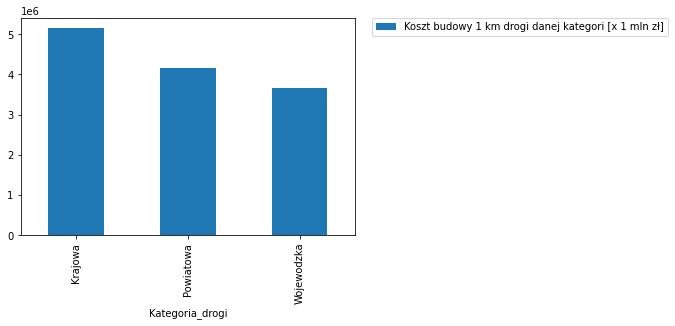

<Figure size 864x576 with 0 Axes>

In [21]:
road_data.groupby(['Kategoria_drogi'], as_index=False).agg({'Wartosc_calkowita_per_km_kat': 'sum'}).sort_values(by=['Wartosc_calkowita_per_km_kat'],ascending=False).plot.bar(x='Kategoria_drogi', y='Wartosc_calkowita_per_km_kat',label='Koszt budowy 1 km drogi danej kategori [x 1 mln zł]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(12,8))

**Visualize the average cost of 1 km of particular road work category**

<Figure size 864x576 with 0 Axes>

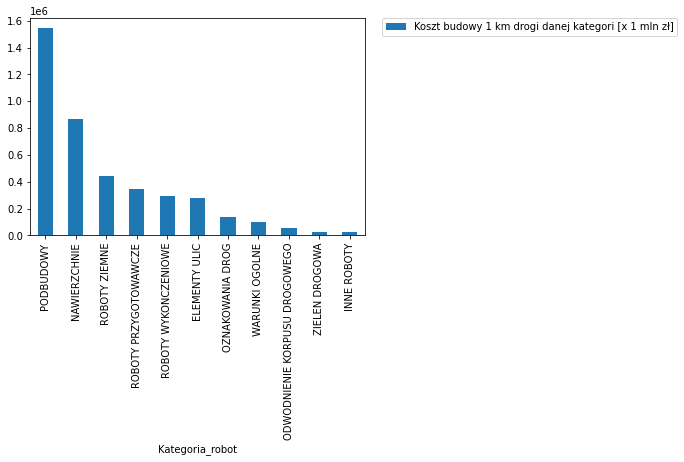

<Figure size 864x576 with 0 Axes>

In [23]:
road_data.groupby(['Kategoria_robot'], as_index=False).agg({'Wartosc_calkowita_per_km_calosc': 'sum'}).sort_values(by=['Wartosc_calkowita_per_km_calosc'],ascending=False).plot.bar(x='Kategoria_robot', y='Wartosc_calkowita_per_km_calosc',label='Koszt budowy 1 km drogi danej kategori [x 1 mln zł]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

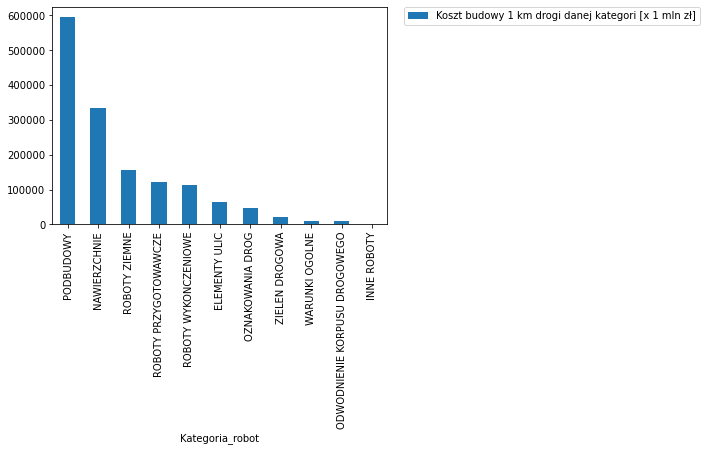

<Figure size 864x576 with 0 Axes>

In [27]:
road_data[road_data['Kategoria_drogi'] == 'Krajowa'].groupby(('Kategoria_robot'), as_index=False).agg({'Wartosc_calkowita_per_km_calosc': 'sum'}).sort_values(by=['Wartosc_calkowita_per_km_calosc'],ascending=False).plot.bar(x='Kategoria_robot', y='Wartosc_calkowita_per_km_calosc',label='Koszt budowy 1 km drogi danej kategori [x 1 mln zł]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

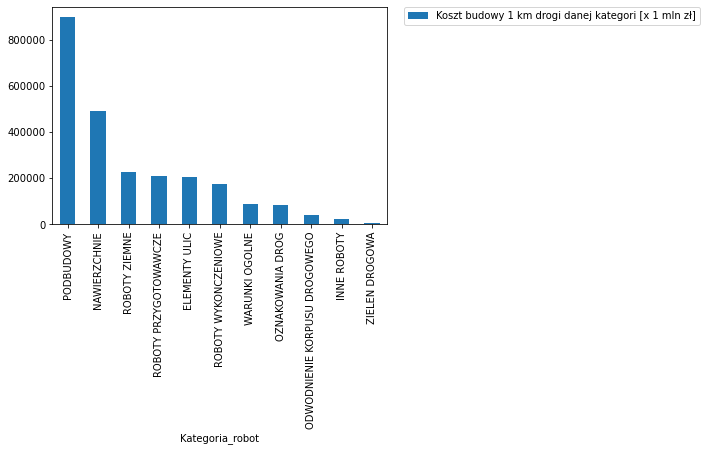

<Figure size 864x576 with 0 Axes>

In [28]:
road_data[road_data['Kategoria_drogi'] == 'Wojewodzka'].groupby(('Kategoria_robot'), as_index=False).agg({'Wartosc_calkowita_per_km_calosc': 'sum'}).sort_values(by=['Wartosc_calkowita_per_km_calosc'],ascending=False).plot.bar(x='Kategoria_robot', y='Wartosc_calkowita_per_km_calosc',label='Koszt budowy 1 km drogi danej kategori [x 1 mln zł]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

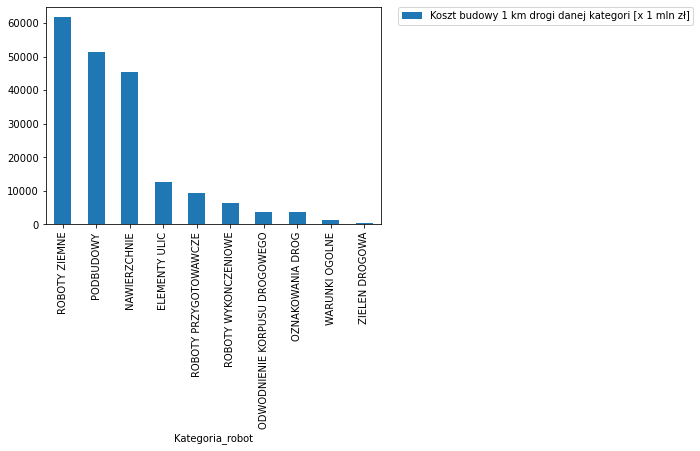

<Figure size 864x576 with 0 Axes>

In [30]:
road_data[road_data['Kategoria_drogi'] == 'Powiatowa'].groupby(('Kategoria_robot'), as_index=False).agg({'Wartosc_calkowita_per_km_calosc': 'sum'}).sort_values(by=['Wartosc_calkowita_per_km_calosc'],ascending=False).plot.bar(x='Kategoria_robot', y='Wartosc_calkowita_per_km_calosc',label='Koszt budowy 1 km drogi danej kategori [x 1 mln zł]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(12,8))

In [32]:
dayHour = road_data.groupby(by=['Rok','Kategoria_robot']).count()['Cena_jedn_calosc'].unstack()
dayHour.head()

Kategoria_robot,ELEMENTY ULIC,INNE ROBOTY,NAWIERZCHNIE,ODWODNIENIE KORPUSU DROGOWEGO,OZNAKOWANIA DROG,PODBUDOWY,ROBOTY PRZYGOTOWAWCZE,ROBOTY WYKONCZENIOWE,ROBOTY ZIEMNE,WARUNKI OGOLNE,ZIELEN DROGOWA
Rok,,,,,,,,,,,
2015-01-01,34,11,43,14,64,62,103,19,15,12,11
2016-01-01,16,6,15,5,31,30,59,14,6,6,8
2017-01-01,16,5,14,4,29,30,53,10,6,6,8
2018-01-01,21,4,28,8,47,38,73,21,10,9,27
2019-01-01,13,3,30,5,43,26,63,13,6,14,23
